In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("/Users/mislam/Desktop/Data/full-game")
data.head()

,98,10629342490369879,26406,-6869,1070,1166235,7161971,-5706,3485,-7435,-2410,-8454,-4765
0,98,10629347605342274,26406,-6869,1070,1166235,7161971,-5706,3485,-7435,-2410,-8454,-4765
1,98,10629352720314738,26406,-6869,1070,1166235,7161971,-5706,3485,-7435,-2410,-8454,-4765
2,98,10629357835286658,26406,-6869,1070,1166235,7161971,-5706,3485,-7435,-2410,-8454,-4765
3,98,10629362950259427,26406,-6869,1070,1166235,7161971,-5706,3485,-7435,-2410,-8454,-4765
4,98,10629368065231435,26406,-6869,1070,1166235,7161971,-5706,3485,-7435,-2410,-8454,-4765


In [2]:
data.shape
data['sid'] = data['98']
data['ts'] = data['10629342490369879']
data['x'] = data['26406']
data['y'] = data['-6869']
data['z'] = data['1070']
data['v'] = data['1166235']
data['a'] = data['7161971']
data['vx'] = data['-5706']
data['vy'] = data['3485']
data['vz'] = data['-7435']
data['ax'] = data['-2410']
data['ay'] = data['-8454']
data['az'] = data['-4765']
data.drop('98', axis=1, inplace=True)
data.drop('10629342490369879', axis=1, inplace=True)
data.drop('26406', axis=1, inplace=True)
data.drop('-6869', axis=1, inplace=True)
data.drop('1070', axis=1, inplace=True)
data.drop('1166235', axis=1, inplace=True)
data.drop('7161971', axis=1, inplace=True)
data.drop('-5706', axis=1, inplace=True)
data.drop('3485', axis=1, inplace=True)
data.drop('-7435', axis=1, inplace=True)
data.drop('-2410', axis=1, inplace=True)
data.drop('-8454', axis=1, inplace=True)
data.drop('-4765', axis=1, inplace=True)
data.head()

,sid,ts,x,y,z,v,a,vx,vy,vz,ax,ay,az
0,98,10629347605342274,26406,-6869,1070,1166235,7161971,-5706,3485,-7435,-2410,-8454,-4765
1,98,10629352720314738,26406,-6869,1070,1166235,7161971,-5706,3485,-7435,-2410,-8454,-4765
2,98,10629357835286658,26406,-6869,1070,1166235,7161971,-5706,3485,-7435,-2410,-8454,-4765
3,98,10629362950259427,26406,-6869,1070,1166235,7161971,-5706,3485,-7435,-2410,-8454,-4765
4,98,10629368065231435,26406,-6869,1070,1166235,7161971,-5706,3485,-7435,-2410,-8454,-4765


In [3]:
data['t'] = data['ts'].apply(lambda x: x/1000000000000)
data.head()

,sid,ts,x,y,z,v,a,vx,vy,vz,ax,ay,az,t
0,98,10629347605342274,26406,-6869,1070,1166235,7161971,-5706,3485,-7435,-2410,-8454,-4765,10629.347605
1,98,10629352720314738,26406,-6869,1070,1166235,7161971,-5706,3485,-7435,-2410,-8454,-4765,10629.352720
2,98,10629357835286658,26406,-6869,1070,1166235,7161971,-5706,3485,-7435,-2410,-8454,-4765,10629.357835
3,98,10629362950259427,26406,-6869,1070,1166235,7161971,-5706,3485,-7435,-2410,-8454,-4765,10629.362950
4,98,10629368065231435,26406,-6869,1070,1166235,7161971,-5706,3485,-7435,-2410,-8454,-4765,10629.368065


In [4]:
#ASAP
import sys
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import pandas as pd
import json
import numpy.fft
from decimal import Decimal
import math
import numpy as np
import matplotlib.pyplot as plt
from pyts.approximation import PAA
%matplotlib inline
# ASAP Simple (Brute Force)
def moving_average(data, _range):
    ret = np.cumsum(data, dtype=float)
    _range = int(_range)
    print(_range, "range")
    ret[_range:] = ret[_range:] - ret[:-_range]
    return ret[_range - 1:] / _range

def SMA(data, _range, slide):
    slide = int(slide)
    ret = moving_average(data, _range)[::slide]
    return list(ret)

def kurtosis(values):
    return scipy.stats.kurtosis(values)

def roughness(vals):
    return np.std(np.diff(vals))

def smooth_simple(data, max_window=5, resolution=None):
    data = np.array(data)
    # Preaggregate according to resolution
    window_size = 1
    slide_size = 1
    if resolution:
        slide_size = int(len(data) // resolution)
        if slide_size > 1:
            data = SMA(data, slide_size, slide_size)
    orig_kurt   = kurtosis(data)
    min_obj     = roughness(data)
    for w in range(2, len(data) // max_window + 1):
        smoothed = SMA(data, w, 1)
        if kurtosis(smoothed) >= orig_kurt:
            r = roughness(smoothed)
            if r < min_obj:
                min_obj = r
                window_size = w
    return window_size, slide_size
# ASAP
class Metrics(object):
    def __init__(self, values):
        self.set_values( values )

    def set_values(self, values):
        self.values = values
        self.r = self.k = None

    @property
    def kurtosis(self):
        if self.k is None:
            self.k = scipy.stats.kurtosis(self.values)
        return self.k

    @property
    def roughness(self):
        if self.r is None:
            self.r = np.std(np.diff(self.values))
        return self.r

class ACF(Metrics):
    CORR_THRESH = 0.2
    def __init__(self, values, max_lag=None):
        super(ACF, self).__init__(values)
        if max_lag is None:
            max_lag = len(values) / 5
        self.max_lag = int(max_lag)
        self.max_acf = 0.0

        # Calculate autocorrelation via FFT
        # Demean
        demeaned = values - np.mean(values)
        # Pad data to power of 2 
        l = int(2.0 ** (int(math.log(len(demeaned),2.0)) + 1))
        padded = np.append(demeaned, ([0.0] * (l - len(demeaned))))    
        # FFT and inverse FFT
        F_f = numpy.fft.fft( padded )
        R_t = numpy.fft.ifft( F_f * np.conjugate(F_f) )
        self.correlations = R_t[:int(max_lag)].real / R_t[0].real
        
        # Find autocorrelation peaks 
        self.peaks = []
        if len(self.correlations) >1 :
            positive = self.correlations[1] > self.correlations[0]
            max = 1
            for i in range(2, len(self.correlations)):
                if not positive and self.correlations[i] > self.correlations[i-1]:
                    max = i
                    positive = not positive
                elif positive and self.correlations[i] > self.correlations[max]:
                    max = i
                elif positive and self.correlations[i] < self.correlations[i-1]:
                    if max > 1 and self.correlations[max] > self.CORR_THRESH:
                        self.peaks.append(max)
                        if self.correlations[max] > self.max_acf:
                            self.max_acf = self.correlations[max]
                    positive = not positive
        # If there is no autocorrelation peak within the MAX_WINDOW boundary,
        # try windows from the largest to the smallest 
        if len(self.peaks) <= 1:
            self.peaks = range(2, len(self.correlations))
                    
def moving_average(data, _range):
    ret = np.cumsum(data)
    _range = int(_range)
    ret[_range:] = ret[_range:] - ret[:-_range]
    return ret[_range - 1:] / _range

def SMA(data, _range, slide):
    slide = int(slide)
    _range = int(_range)
    ret = moving_average(data, _range)[::slide]
    return list(ret)
                    
def binary_search(head,tail,data,min_obj,orig_kurt,window_size):
    while head <= tail:
        w = int(round((head + tail) / 2.0))
        smoothed = SMA(data,w,1)
        metrics  = Metrics(smoothed)
        if metrics.kurtosis >= orig_kurt:
            if metrics.roughness < min_obj:
                window_size = w
                min_obj = metrics.roughness
            head = w + 1
        else:
            tail = w - 1
    return window_size

def smooth_ASAP(data, max_window=5, resolution=None):
    data = np.array(data)
    # Preaggregate according to resolution
    slide_size = 1
    window_size = 1
    if resolution and len(data) >= 2 * resolution:
        slide_size = len(data) / resolution
        data = SMA(data, slide_size, slide_size)
    acf         = ACF(data, max_lag=len(data) / max_window)
    peaks       = acf.peaks
    orig_kurt   = acf.kurtosis
    min_obj     = acf.roughness
    lb          = 1
    largest_feasible = -1
    tail = len(data) / max_window
    for i in range(len(peaks) - 1, -1, -1):
        w = peaks[i]

        if w < lb or w == 1:
            break
        elif math.sqrt(1 - acf.correlations[w]) * window_size > math.sqrt(1 - acf.correlations[window_size]) * w:
            continue

        smoothed = SMA(data, w, 1)
        metrics = Metrics(smoothed)
        if metrics.roughness < min_obj and metrics.kurtosis >= orig_kurt:
            min_obj = metrics.roughness
            window_size = w
            lb = round( max(w*math.sqrt( (acf.max_acf -1) / (acf.correlations[w]-1) ), lb) )
    if largest_feasible > 0:
        if largest_feasible < len(peaks) - 2:
            tail = peaks[largest_feasible + 1]
        lb = max(lb, peaks[largest_feasible] + 1)

    window_size = binary_search(lb, tail, data, min_obj, orig_kurt, window_size)
    return window_size, slide_size

(49576079, 14)


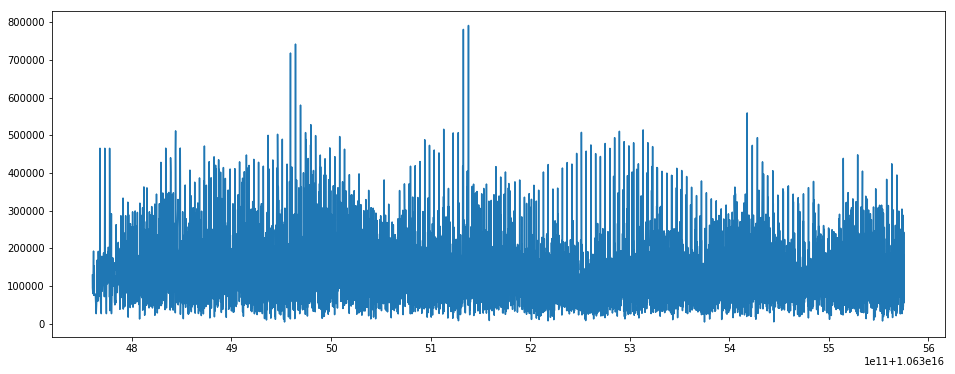

--- 0.4106619358062744 seconds ---


In [6]:
import time


da = data.iloc[50:10000]
print(data.shape)
da.head()
start = time.time()
import matplotlib.pyplot as plt
X = np.array(da['ts'])
Y = np.array(da['v'])
plt.figure(figsize=(16,6))
plt.plot(X,Y)
plt.savefig("d13/original.png")
plt.show()
end = time.time()
print("--- %s seconds ---" % (end - start))


--- 0.40224480628967285 seconds ---
(9950, 14)
4809


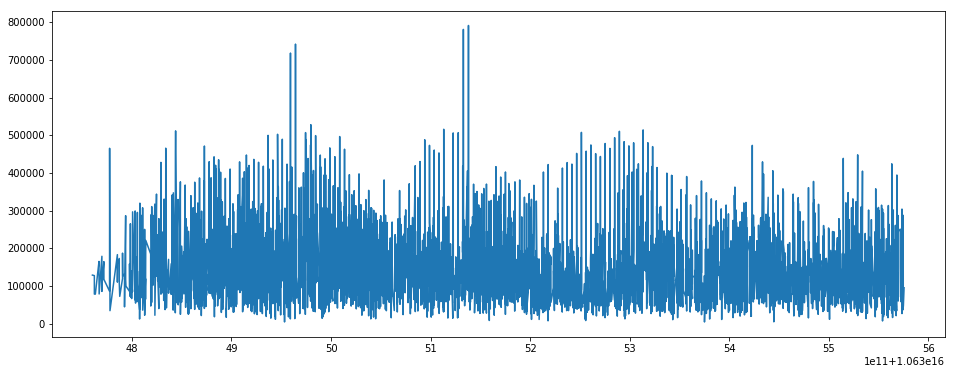

In [7]:
#PASS
col = 'v'
def window_sample(data,theta = 5):
    if(len(data) <=2):
        return data
    ret = []
    first = data.iloc[0]
    second = data.iloc[1]
    x1 = first["ts"]
    x2 = second["ts"]
    y1 = first[col]
    y2 = second[col]
    running_angle = np.rad2deg(np.arctan2(1.0*(y2-y1), 1.0*(x2-x1)))
    current_angle = running_angle
    others = data.iloc[2:len(data)]
    ret.append(first)
    prev = second
    for index, current in others.iterrows():
        x1 = prev["ts"]
        x2 = current["ts"]
        y1 = prev[col]
        y2 = current[col]
        current_angle = np.rad2deg(np.arctan2(1.0*abs(y2-y1), 1.0*abs(x2-x1)))
        #print("{0} {1} {2} {3} {4}".format(y1,y2,x1,x2,current_angle))
        if abs(current_angle - running_angle) > theta:
            running_angle = current_angle
            ret.append(prev)
            ret.append(current)
        prev = current
    ret.append(prev)
    return ret
#Winsample
start = time.time()
wsample = window_sample(da,.18)
end = time.time()
print("--- %s seconds ---" % (end - start))


ws = {}
w = []
for a in wsample:
    if a["ts"] not in ws:
        w.append(a)
        ws[a['ts']] = True

print(da.shape)        
print(len(w))

wframe = pd.DataFrame(w)
x = np.array(wframe['ts'])
y = np.array(wframe['v'])
plt.figure(figsize=(16,6))
plt.plot(x,y)
plt.savefig("d13/win.png")
plt.show()

4975
--- 1.0653371810913086 seconds ---


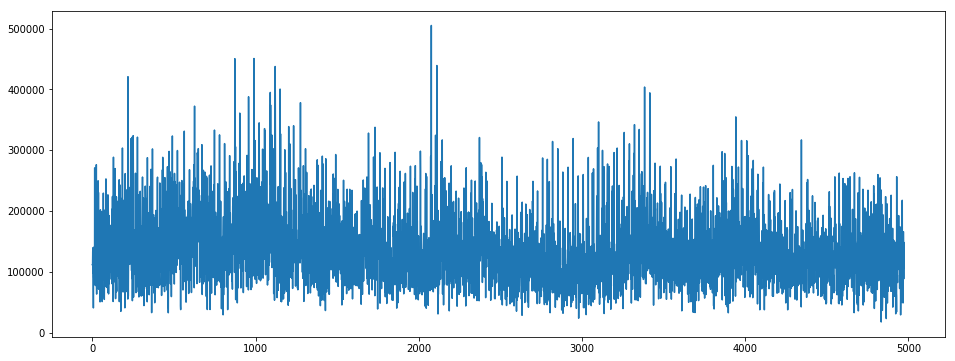

In [8]:
#ASAP
start = time.time()
mf3 = da["v"].tolist()
win_size, s_size = smooth_ASAP(mf3, resolution=4000)
#window_size, slide_size = smooth_simple(raw_data, resolution=1000)
dt = SMA(mf3, s_size, s_size)
smoothed = SMA(dt, win_size, 1)
smoothed_range = range(int(win_size/2), int(win_size/2) + len(smoothed))

plt.figure(figsize=(16,6))
plt.plot(smoothed_range,smoothed)
print(len(smoothed))
end = time.time()
print("--- %s seconds ---" % (end - start))


#plt.axis('off')
#plt.title("ASAP")
#plt.savefig('window_taxi.pdf')
#plt.axis('off')

plt.show()

4975
--- 0.13129901885986328 seconds ---


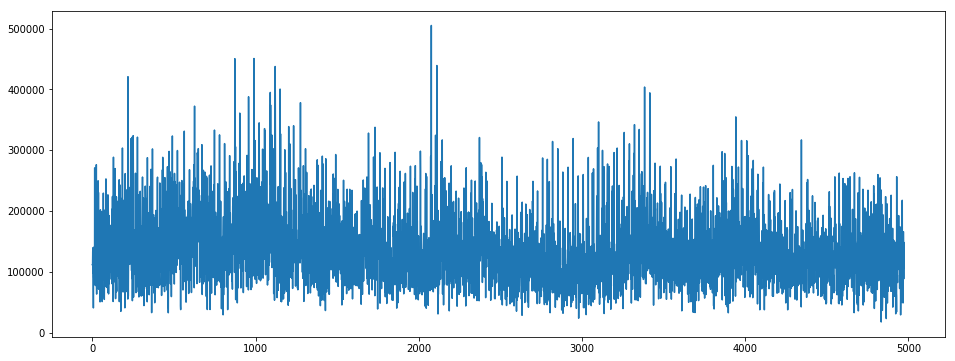

In [9]:
#PAA
start = time.time()
window_size = 2
paa = PAA(window_size=window_size)
X_paa = paa.transform([da["v"]])
print(len(X_paa[0]))
plt.figure(figsize=(16,6))
#plt.title("PAA(Window Size=4)")
plt.plot(X_paa[0])
plt.savefig("d13/paa.png")
end = time.time()
print("--- %s seconds ---" % (end - start))


plt.show()

--- 3.1969850063323975 seconds ---
4840


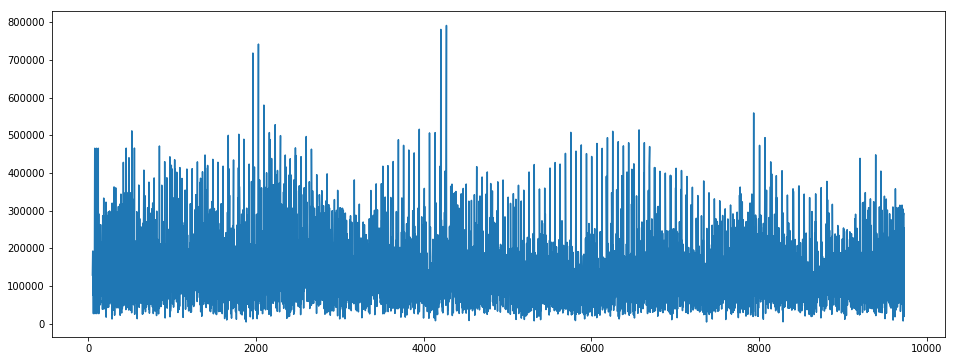

In [10]:
w = 1210
start = time.time()
def m4(data, w):
    wsize = data.shape[0]//w
    ret = []
    seen = {}
    for g in range(0,w):
        maxv = None
        minv = None
        first = None
        last = None
        indices = [0,0,0,0]
        for i in range(g*wsize, g*wsize + wsize):
            if minv is None:
                minv = data.iloc[i]
                indices[0] = i
            elif data.iloc[i]["v"] < minv["v"]:
                minv = data.iloc[i]
                indices[0] = i
            if maxv is None:
                maxv = data.iloc[i]
                indices[1] = i
            elif data.iloc[i].v > maxv.v:
                maxv = data.iloc[i]
                indices[1] = i
            if i == g*wsize:
                first = data.iloc[i]
                indices[2] = i
            if i == g*wsize + wsize - 1:
                last = data.iloc[i]
                indices[3] = i
        indices.sort()
        for j in range(0, len(indices)):
            if indices[j] in seen:
                continue
            seen[j] = True
            ret.append(data.iloc[indices[j]])
    df = pd.DataFrame(ret)
    #df = df.sort_values("timestamp")
    return df
ret = m4(da,w)
end = time.time()
print("--- %s seconds ---" % (end - start))


plt.figure(figsize=(16,6))
plt.plot(ret["v"])
print(len(ret["v"]))
fig = plt.gcf()
#plt.title("M4")
#plt.savefig('M4_taxi.pdf')
plt.savefig("d13/m4.png")


plt.show()



--- 3.0201070308685303 seconds ---
4840


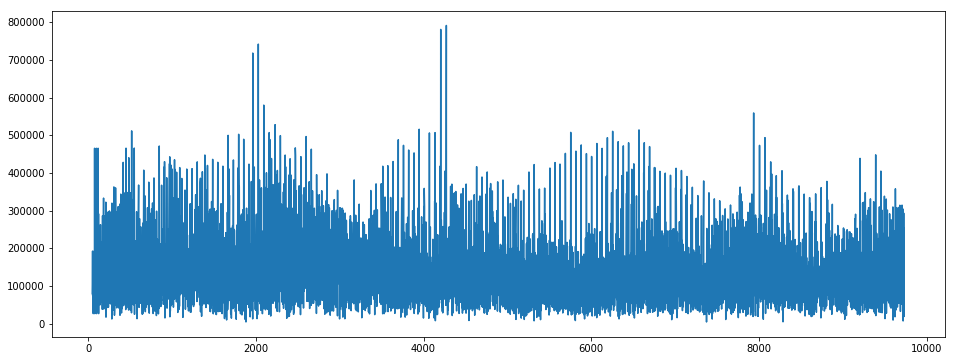

In [11]:
# MinMax
start = time.time()
def minmax(data, w):
    wsize = data.shape[0]//w
    ret = []
    seen = {}
    for g in range(0,w):
        maxv = None
        minv = None
        indices = [0,0]
        for i in range(g*wsize, g*wsize + wsize):
            if minv is None:
                minv = data.iloc[i]
                indices[0] = i
            elif data.iloc[i]["v"] < minv["v"]:
                minv = data.iloc[i]
                indices[0] = i
            if maxv is None:
                maxv = data.iloc[i]
                indices[1] = i
            elif data.iloc[i].v > maxv.v:
                maxv = data.iloc[i]
                indices[1] = i
        indices.sort()
        for j in range(0, len(indices)):
            if indices[j] in seen:
                continue
            seen[j] = True
            ret.append(data.iloc[indices[j]])
    df = pd.DataFrame(ret)
    #df = df.sort_values("timestamp")
    return df

ret = minmax(da,2*w)

#M4
end = time.time()
print("--- %s seconds ---" % (end - start))


plt.figure(figsize=(16,6))
plt.plot(ret["v"])
print(len(ret["v"]))
fig = plt.gcf()
#plt.title("Minmax")
plt.savefig("d13/minmax.png")
#plt.savefig('M4_taxi.pdf')
plt.show()

4989
                   0       1
0  10634760315481787  128850
1  10634761455926662  192583
2  10634761763922106   75036
3  10634762051865344  153012
4  10634764098437916   26495
--- 5.488208055496216 seconds ---


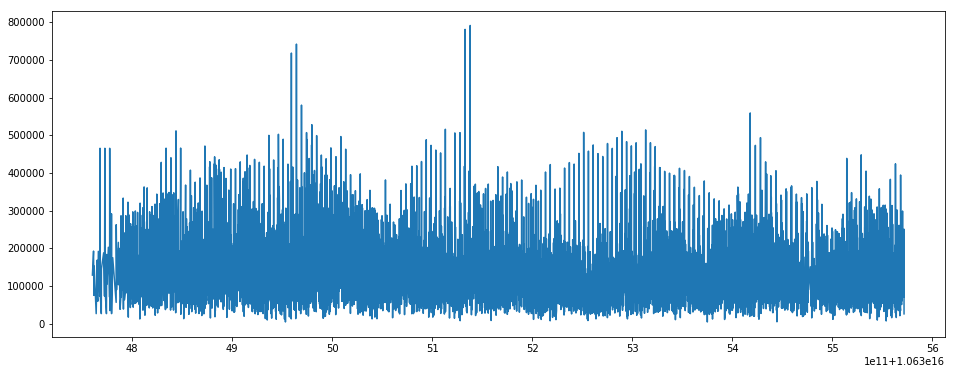

In [12]:
from rdp import rdp
D = []
start = time.time()
X = da["ts"]
Y = da["v"]
for i in range(50,len(X)):
    D.append([X[i],Y[i]])
dp = rdp(D,epsilon = 80000)
print(len(dp))
dframe = pd.DataFrame(dp)
print(dframe.head())
x = np.array(dframe[0])
y = np.array(dframe[1])
end = time.time()
print("--- %s seconds ---" % (end - start))


plt.figure(figsize=(16,6))
plt.plot(x,y)
plt.savefig("d13/rdp.png")
plt.show()



4951
--- 0.25903797149658203 seconds ---


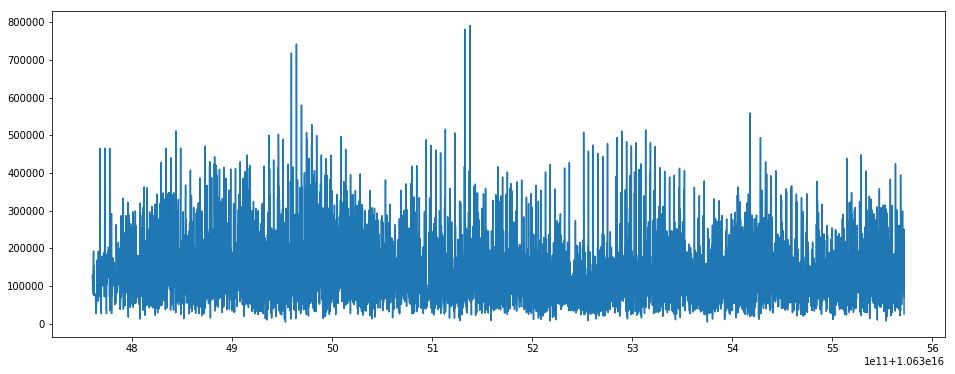

In [13]:
import visvalingamwyatt as vw
start = time.time()
D = []
X = da["ts"]
Y = da["v"]
for i in range(50,len(X)):
    D.append([X[i],Y[i]])
simplifier = vw.Simplifier(D)
vwd = simplifier.simplify(ratio = .5)

print(len(vwd))
dframe = pd.DataFrame(vwd)
x = np.array(dframe[0])
y = np.array(dframe[1])
end = time.time()
print("--- %s seconds ---" % (end - start))


plt.figure(figsize=(16,6))
plt.plot(x,y)
#plt.title("VWD sampling")
plt.savefig("d13/vwd.png")
plt.show()

4876
    sid                 ts      x     y    z       v        a    vx    vy  \
55   64  10634761763922106  28524 -1465 -225   75036  1572155 -9791  1298   
55   64  10634761763922106  28524 -1465 -225   75036  1572155 -9791  1298   
56  106  10634761978893970  25352 -2712  274  105690   742290  1230 -5327   
57   66  10634761986340719  27812  -559   70   91202  2322859  4381 -4941   
58   61  10634762051865344  27058  -131 -113  153012  1831362  3276 -9168   

      vz    ax    ay    az             t  
55 -1565 -9976  -668  -112  10634.761764  
55 -1565 -9976  -668  -112  10634.761764  
56 -8373   522 -9166 -3963  10634.761979  
57  7508  8301 -5433  1247  10634.761986  
58 -2280  5227 -8301  1936  10634.762052  


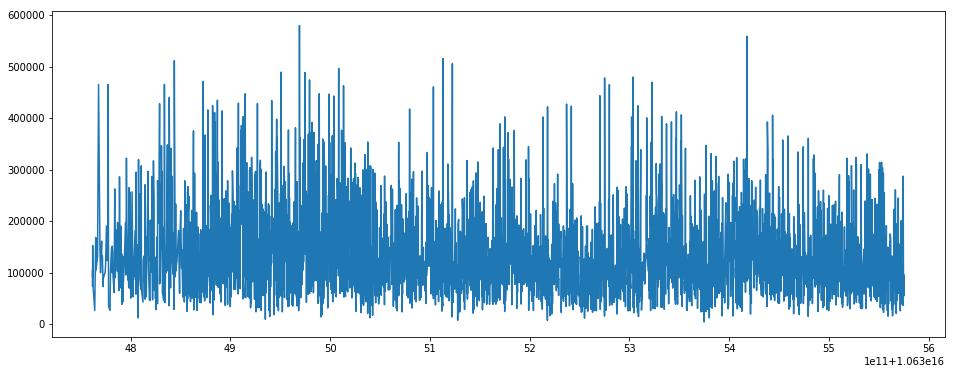

--- 0.22555899620056152 seconds ---


In [16]:
# Random sampling
# Random 
start = time.time()
ran = da.sample(frac=0.49, replace=True)
ran = ran.sort_values(["ts"])
print(len(ran))
x = np.array(ran["ts"])
y = np.array(ran["v"])
print(ran.head())
plt.figure(figsize=(16,6))
plt.plot(x,y)
# plt.title("Random sampling")
plt.savefig("d13/random.png")

plt.show()
end = time.time()

print("--- %s seconds ---" % (end - start))



<class 'pandas.core.frame.DataFrame'>
(4875, 14)


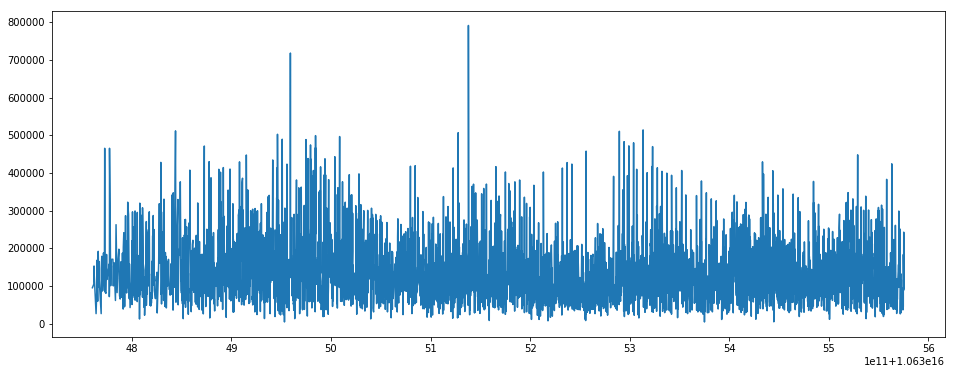

--- 0.26122498512268066 seconds ---


In [17]:
#Stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit
start = time.time()


sss = StratifiedShuffleSplit(n_splits=1, test_size=0.51, random_state=0)

T = [0]*da.shape[0]
traini= sss.split(da,T)
D = pd.DataFrame()
for t,i in traini:
    print(type(da.iloc[t]))
    D = da.iloc[t]
#print(D)
print(D.shape)
D = D.sort_values(["ts"])

x = np.array(D["ts"])
y = np.array(D["v"])
plt.figure(figsize=(16,6))
plt.plot(x,y)
plt.savefig("d13/stratified.png")
plt.show()
end = time.time()

print("--- %s seconds ---" % (end - start))



